Calculated tilt angle: -15.95 degrees


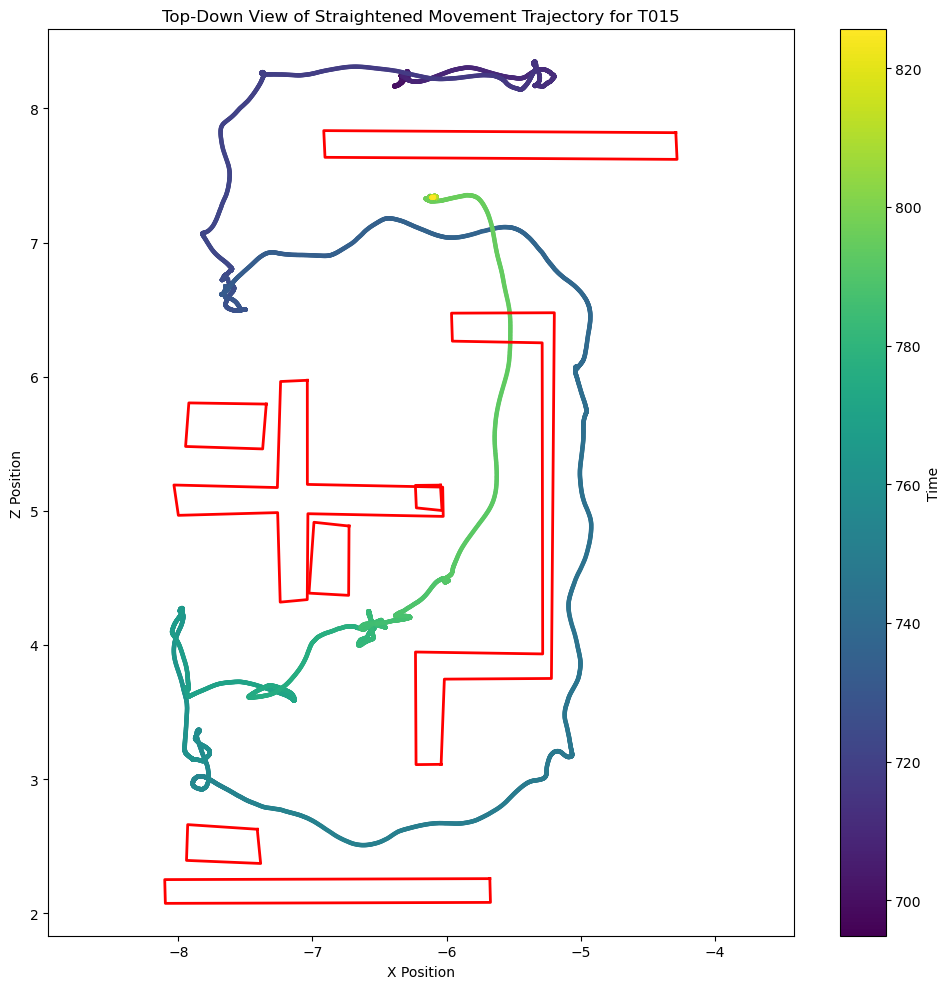

In [1]:
from plotting_utils import plot_movement_trajectory_with_layout
import os

trackers_data_path = os.path.join('BEA_edges_11.09.24', 'S001', 'trackers')

tracker_file = os.path.join(trackers_data_path, 'maze/camera_movement_T015_02.csv')
plot_movement_trajectory_with_layout(tracker_file)


time     0.011118
pos_x    0.001483
pos_y    0.000508
pos_z    0.001554
rot_x    0.199462
rot_y    0.280741
rot_z    0.078935
dist     0.002537
speed    0.229084
dtype: float64
time     0.011095
pos_x    0.002974
pos_y    0.000860
pos_z    0.003112
rot_x    0.301555
rot_y    0.429301
rot_z    0.107087
dist     0.005016
speed    0.453218
dtype: float64


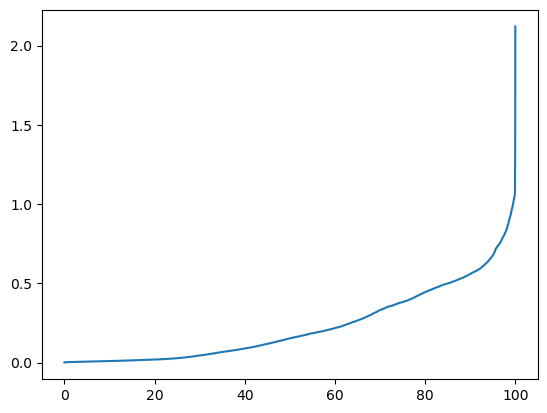

In [22]:
from calculations import calculate_total_rotation, df_diff
import pandas as pd
import numpy as np

movement_data = pd.read_csv(tracker_file).drop("timestamp", axis=1)
diff_frame = df_diff(movement_data)
diff_frame["dist"] = np.sqrt(diff_frame["pos_x"].pow(2) + diff_frame["pos_y"].pow(2) + diff_frame["pos_z"].pow(2))
diff_frame["speed"] = diff_frame["dist"] / diff_frame["time"]
print(diff_frame.mean())
import matplotlib.pyplot as plt
y = np.sort(diff_frame["speed"])
x = 100*np.arange(len(y))/len(y)

print(diff_frame[diff_frame["speed"] > 0.2].mean())
plt.plot(x,y)